# PROJECT MODULE IV - RESÍLIA - GROUP 7

   ## Preço de Venda da Gasolina e do Etanol [Série Histórica]

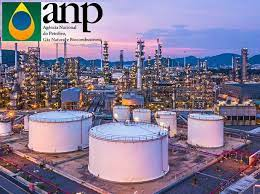

## I. INTRODUCTION

### I.I Briefing

A ANP é um centro de referência em dados e informações sobre a indústria de petróleo e gás natural:
    
 - mantém o Banco de Dados de Exploração e Produção (BDEP);
 - promove estudos sobre o potencial petrolífero e o desenvolvimento do setor;
 - recebe e torna públicas as notificações de descobertas;
 - divulga as estatísticas oficiais sobre reservas, refino e produção de petróleo, gás e biocombustíveis no Brasil.

O órgão também realiza e divulga rotineiramente pesquisas sobre qualidade dos combustíveis e lubrificantes e sobre o comportamento dos preços desses produtos. Consolida e divulga informações sobre os mercados regulados e acerca dos investimentos em pesquisa, inovação e formação profissional voltadas para os setores regulados.

ATIVIDADE:
**Realizar uma análise exploratória relacionada à série histórica de preço de venda da gasolina e do etanol.**

Fontes de dados a serem utilizadas estão disponíveis no portal dados.gov (https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/). O estudo baseará nos arquivos dos meses de junho e julho de 2021 contendo a série histórica dos preços da gasolina e do etanol em todo o Brasil.

### I.II  Problems to Solve

1) Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?

2) Qual o preço médio da gasolina e do etanol nesses dois meses?

3) Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?

4) Qual o preço médio da gasolina e do etanol por estado?

5) Qual o município que possui o menor preço para a gasolina e para o etanol?

6) Qual o município que possui o maior preço para a gasolina e para o etanol?

7) Qual a região que possui o maior valor médio da gasolina?

8) Qual a região que possui o menor valor médio do etanol?

9) Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?

10) Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

***EXTRAS***

11) Outlier Gasolina

12) Outlier Etanol


Link dos Datasets:<br>
https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-07-gasolina-etanol.csv <br>
https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-06-gasolina-etanol.csv <br>


## II. IMPORTS

### II.I Libraries and Configs

In [414]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,8))

### II.II Datasets


In [28]:
url = 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-06-gasolina-etanol.csv'
gasol06 = pd.read_csv(url, engine = 'python', on_bad_lines='skip', sep = ';')
gasol06.head(1)

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA,02/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.


In [29]:
url = 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-07-gasolina-etanol.csv'
gasol07 = pd.read_csv(url,on_bad_lines='skip',sep = ';')
gasol07.head(1)

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,NaN,PARQUE LUZARDO VIANA,61910-000,GASOLINA,01/07/2021,"5,499",NaN,R$ / litro,IPIRANGA


## III. TREATMENT, CLEANING AND INTRODUCTORY EXPLORATIONS


In [91]:
#Functions

#Função para trocar vírgula por ponto e converter em float
def convertFloatMonetary(dfDef, colunaDef):
    dfDef[colunaDef] = dfDef[colunaDef].apply(lambda x: float(x.replace(",",".")))
    
#Função para substituir valores NaN do dataframe por um de sua escolha
def filterNoneSubstitute(dfDef, colunaDef, dataDef):
    dfDef.fillna({colunaDef: dataDef}, inplace = True)

#Função para deletar colunas do dataframe
def deleteColumns(dfDef, columnsDef):
    dfDef.drop(axis = 1, columns = columnsDef, inplace = True)
    
#Visualizar data em formato brasileiro | tipo: Padrão br; d - Dia; m - Mês; a - Ano
def formatDate(dfColumnDef, tipoDef = ''):
    if tipoDef == 'd':
        return dfColumnDef.dt.strftime('%d')
    elif tipoDef == 'm':
        return dfColumnDef.dt.strftime('%m')
    elif tipoDef == 'a':
        return dfColumnDef.dt.strftime('%Y')
    else:
        return dfColumnDef.dt.strftime('%d/%m/%Y')

In [31]:
#Análise de objetos
gasol06.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49737 entries, 0 to 49736
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Região - Sigla     49737 non-null  object 
 1   Estado - Sigla     49737 non-null  object 
 2   Município          49737 non-null  object 
 3   Revenda            49737 non-null  object 
 4   CNPJ da Revenda    49737 non-null  object 
 5   Nome da Rua        49737 non-null  object 
 6   Número Rua         49714 non-null  object 
 7   Complemento        10052 non-null  object 
 8   Bairro             49613 non-null  object 
 9   Cep                49737 non-null  object 
 10  Produto            49737 non-null  object 
 11  Data da Coleta     49737 non-null  object 
 12  Valor de Venda     49737 non-null  object 
 13  Valor de Compra    0 non-null      float64
 14  Unidade de Medida  49737 non-null  object 
 15  Bandeira           49737 non-null  object 
dtypes: float64(1), object(

In [32]:
gasol07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47849 entries, 0 to 47848
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Região - Sigla     47849 non-null  object 
 1   Estado - Sigla     47849 non-null  object 
 2   Município          47849 non-null  object 
 3   Revenda            47849 non-null  object 
 4   CNPJ da Revenda    47849 non-null  object 
 5   Nome da Rua        47849 non-null  object 
 6   Número Rua         47815 non-null  object 
 7   Complemento        9659 non-null   object 
 8   Bairro             47714 non-null  object 
 9   Cep                47849 non-null  object 
 10  Produto            47849 non-null  object 
 11  Data da Coleta     47849 non-null  object 
 12  Valor de Venda     47849 non-null  object 
 13  Valor de Compra    0 non-null      float64
 14  Unidade de Medida  47849 non-null  object 
 15  Bandeira           47849 non-null  object 
dtypes: float64(1), object(

In [33]:
#Substituição da vírgula para ponto, conversão de dados object para float 
convertFloatMonetary(gasol07, 'Valor de Venda')
convertFloatMonetary(gasol06, 'Valor de Venda')

In [34]:
#Tratando dados faltantes do Dataframe que não afetam em valores (questão didática para treinar/alimentar meu projeto)
#print(gasol06[gasol06['Número Rua'].isnull()].shape[0])
filterNoneSubstitute(gasol07, 'Número Rua', '')
filterNoneSubstitute(gasol06, 'Número Rua', '')
filterNoneSubstitute(gasol07, 'Bairro', '')
filterNoneSubstitute(gasol06, 'Bairro', '')
#print(gasol06[gasol06['Número Rua'].isnull()].shape[0])

In [35]:
#Exclusão de coluna que não tem valor algum
deleteColumns(gasol06, ['Valor de Compra'])
deleteColumns(gasol07, ['Valor de Compra'])

In [122]:
gasol06.head()

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA,2021-02-06,6.89,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA ADITIVADA,2021-02-06,6.89,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,ETANOL,2021-01-06,6.10,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,GASOLINA,2021-01-06,6.89,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0004-94,AVENIDA LAURO MULLER,943,NaN,JOÃO ALVES,69980-000,GASOLINA,2021-02-06,6.89,R$ / litro,BRANCA


In [36]:
#Converter coluna para o tipo Data e formato brasileiro
gasol06['Data da Coleta'] = pd.to_datetime(gasol06['Data da Coleta'])
gasol07['Data da Coleta'] = pd.to_datetime(gasol07['Data da Coleta'])

In [139]:
#Criação de coluna para especificar mês de referência do dado agregado
gasol06['Mes Agregado'] = 'Junho'
gasol07['Mes Agregado'] = 'Julho'

In [140]:
#Concatenação (deixei duplicado antes para poder desfrutar das functions por df rs)
dfGasol = pd.concat([gasol06,gasol07])
dfGasol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97586 entries, 0 to 47848
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Região - Sigla     97586 non-null  object        
 1   Estado - Sigla     97586 non-null  object        
 2   Município          97586 non-null  object        
 3   Revenda            97586 non-null  object        
 4   CNPJ da Revenda    97586 non-null  object        
 5   Nome da Rua        97586 non-null  object        
 6   Número Rua         97586 non-null  object        
 7   Complemento        19711 non-null  object        
 8   Bairro             97586 non-null  object        
 9   Cep                97586 non-null  object        
 10  Produto            97586 non-null  object        
 11  Data da Coleta     97586 non-null  datetime64[ns]
 12  Valor de Venda     97586 non-null  float64       
 13  Unidade de Medida  97586 non-null  object        
 14  Bandei

In [141]:
#Tratar outliers [Descartado]
#dfGasol.boxplot(['Valor de Venda'])

#valor = dfGasol['Valor de Venda']

#Q1 = valor.quantile(.25)
#Q3 = valor.quantile(.75)
#IIQ = Q3 - Q1
#limite_inferior = Q1 - 1.5 * IIQ
#limite_superior = Q3 + 1.5 * IIQ

#selecao = (valor >=limite_inferior) & (valor <= limite_superior)
#dfGasol_new = dfGasol[selecao]
#dfGasol_new.boxplot(['Valor de Venda'])

In [142]:
#Criação de coluna Tipo Agregado para facilitar a interpretação dos tipos 1x1
gasolina = ['GASOLINA', 'GASOLINA ADITIVADA']
dfGasol['Tipo Agregado'] = dfGasol['Produto'].apply(lambda x: 'GASOLINA' if x in gasolina else 'ETANOL')
dfGasol[['Produto', 'Tipo Agregado']].head(2)

,Produto,Tipo Agregado
0,GASOLINA,GASOLINA
1,GASOLINA ADITIVADA,GASOLINA


## IV. DATA ANALYSIS

### VI.I Questions 1 - 4 [Jonathas]

**1) Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?**

In [357]:
#Julho teve queda no valor total de vendas em comparação ao mês anterior de aproximadamente 2,12%
print(
      f"Valor Junho: R$ {gasol06['Valor de Venda'].sum():.2f} - Quantidade Vendas: {gasol06['Valor de Venda'].count()}\n"
      f"Valor Julho: R$ {gasol07['Valor de Venda'].sum():.2f} - Quantidade Vendas: {gasol07['Valor de Venda'].count()}\n"
      f"Variação de: ~{(gasol06['Valor de Venda'].sum() - gasol07['Valor de Venda'].sum()) / gasol06['Valor de Venda'].sum() * 100:.2f}%\n\n"
      f"Valor Total: R$ {dfGasol['Valor de Venda'].sum():.2f} - Quantidade Total : {dfGasol['Valor de Venda'].count()}")

Valor Junho: R$ 265556.38 - Quantidade Vendas: 49737
Valor Julho: R$ 259937.28 - Quantidade Vendas: 47849
Variação de: ~2.12%

Valor Total: R$ 525493.66 - Quantidade Total : 97586


In [358]:
#A média de preços aumentou no mês de julho, como visto no preço mínimo e máximo. É visível que, consequentemente, a quantidade 
#vendida baixou.
dfGasol.groupby(['Mes Agregado'])['Valor de Venda'].describe()

,count,mean,std,min,25%,50%,75%,max
Mes Agregado,,,,,,,,
Julho,47849.0,5.432450,0.743060,3.189,4.999,5.599,5.99,7.097
Junho,49737.0,5.339212,0.684101,3.097,4.899,5.499,5.85,6.999


In [359]:
#Para reforçar que os preços realmente tiveram alta, podemos observar o preço médio (mean) dos produtos nos dois meses.
dfGasol.groupby(['Mes Agregado', 'Produto'])['Valor de Venda'].describe()

count      mean       std    min    25%  \
Mes Agregado Produto                                                         
Julho        ETANOL              16120.0  4.587550  0.554442  3.189  4.099   
             GASOLINA            18149.0  5.800254  0.353588  4.549  5.499   
             GASOLINA ADITIVADA  13580.0  5.943826  0.351831  4.690  5.690   
Junho        ETANOL              16976.0  4.576389  0.513681  3.097  4.190   
             GASOLINA            18804.0  5.671506  0.330988  4.398  5.399   
             GASOLINA ADITIVADA  13957.0  5.819346  0.334867  4.199  5.589   

                                   50%    75%    max  
Mes Agregado Produto                                  
Julho        ETANOL              4.399  4.999  6.999  
             GASOLINA            5.795  5.999  6.999  
             GASOLINA ADITIVADA  5.930  6.196  7.097  
Junho        ETANOL              4.399  4.989  6.999  
             GASOLINA            5.649  5.899  6.890  
             GASOLINA ADITIVADA  5.799  5.999  6.999

In [337]:
#Criando dataframes para analisar por produto separado e por mês, no ano.
#Junho
gasol06_2 = gasol06.copy()
gasol06_2['Mes'] = gasol06_2['Data da Coleta'].dt.strftime('%m')
selEtanol = gasol06_2['Produto'] == 'ETANOL'
selGasol = gasol06_2['Produto'] == 'GASOLINA'
selAdit = gasol06_2['Produto'] == 'GASOLINA ADITIVADA'
dados06Et = gasol06_2[selEtanol]
dados06Ga = gasol06_2[selGasol]
dados06Ad = gasol06_2[selAdit]

In [338]:
#Criando dataframes para analisar por produto separado e por mês, no ano.
#Julho
gasol07_2 = gasol07.copy()
gasol07_2['Mes'] = gasol07_2['Data da Coleta'].dt.strftime('%m')
selEtanol = gasol07_2['Produto'] == 'ETANOL'
selGasol = gasol07_2['Produto'] == 'GASOLINA'
selAdit = gasol07_2['Produto'] == 'GASOLINA ADITIVADA'
dados07Et = gasol07_2[selEtanol]
dados07Ga = gasol07_2[selGasol]
dados07Ad = gasol07_2[selAdit]

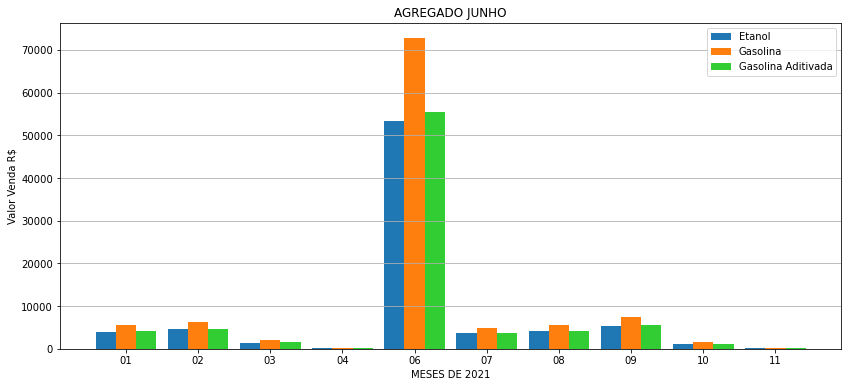

In [365]:
#Concentração no mês de julho
wid = 0.28
r1 = np.arange(len(dados06Et['Mes'].unique()))
r2 = [x + wid for x in r1]
r3 = [x + wid for x in r2]
plt.bar(r1, dados06Et.groupby(['Mes'])['Valor de Venda'].sum(), width = wid, label = 'Etanol')
plt.bar(r2, dados06Ga.groupby(['Mes'])['Valor de Venda'].sum(), width = wid, label = 'Gasolina')
plt.bar(r3, dados06Ad.groupby(['Mes'])['Valor de Venda'].sum(), width = wid, label = 'Gasolina Aditivada', color = '#32CD32')
plt.xticks([r + wid for r in range(len(dados06Et['Mes'].unique()))], dados06Et['Mes'].sort_values().unique())
plt.ylabel('Valor Venda R$')
plt.xlabel('MESES DE 2021')
plt.title('AGREGADO JUNHO')
plt.legend()
plt.grid(axis = 'y')
plt.show()

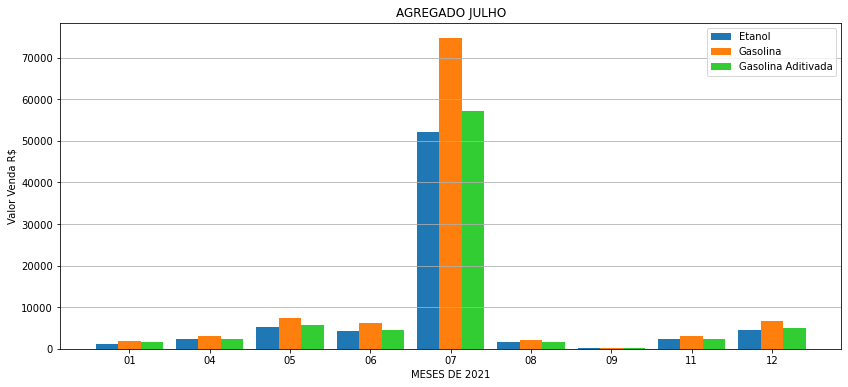

In [366]:
#O somatório de quantidade vendida no meses tiveram alta
wid = 0.28
r1 = np.arange(len(dados07Et['Mes'].unique()))
r2 = [x + wid for x in r1]
r3 = [x + wid for x in r2]
plt.bar(r1, dados07Et.groupby(['Mes'])['Valor de Venda'].sum(), width = wid, label = 'Etanol')
plt.bar(r2, dados07Ga.groupby(['Mes'])['Valor de Venda'].sum(), width = wid, label = 'Gasolina')
plt.bar(r3, dados07Ad.groupby(['Mes'])['Valor de Venda'].sum(), width = wid, label = 'Gasolina Aditivada', color = '#32CD32')
plt.xticks([r + wid for r in range(len(dados07Et['Mes'].unique()))], dados07Et['Mes'].sort_values().unique())
plt.ylabel('Valor Venda R$')
plt.xlabel('MESES DE 2021')
plt.title('AGREGADO JULHO')
plt.legend()
plt.grid(axis = 'y')
plt.show()

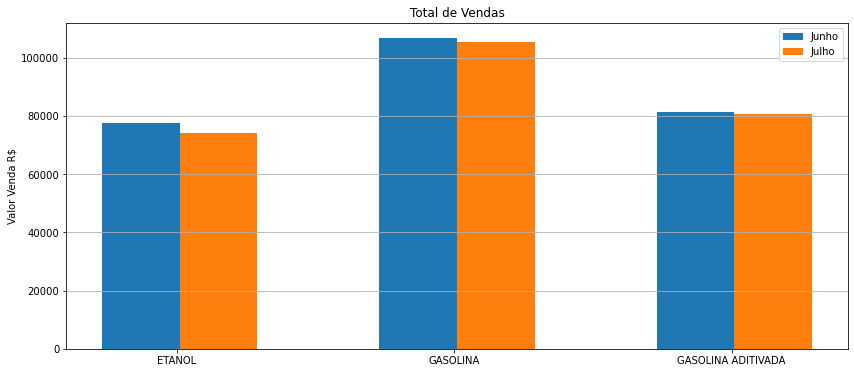

In [367]:
#Total da venda quase que equipararam
wid = 0.28
r1 = np.arange(len(gasol07['Produto'].unique()))
r2 = [x + wid for x in r1]
plt.bar(r1, gasol06.groupby(['Produto'])['Valor de Venda'].sum(), width = wid, label = 'Junho')
plt.bar(r2, gasol07.groupby(['Produto'])['Valor de Venda'].sum(), width = wid, label = 'Julho')
plt.xticks([r - 0.15 + wid for r in range(len(gasol07['Produto'].unique()))], gasol07['Produto'].sort_values().unique())
plt.title('Total de Vendas')
plt.ylabel('Valor Venda R$')
plt.legend()
plt.grid(axis = 'y')
plt.show()

- Julho teve alta nos preços, em comparação ao mês anterior, de aproximadamente 2,12%

- A média de preços aumentou no mês de julho, como visto nos preços mínimo e máximo. Também é visível que, contrapondo a alta, a quantidade vendida baixou. 

- Com isso, o valor do agregado do mês não superou o anterior.

- Para reforçar que os preços realmente tiveram alta, enxergamos ao observar o preço médio (mean) dos produtos por mês.

*Resumindo: Os valores tiveram alta, mas a quantidade baixou, e conforme o gráfico, a tendência é de alta no valor e equilíbrio na quantidade vendida*

**2) Qual o preço médio da gasolina e do etanol nesses dois meses?**

In [369]:
print(
      f"Preço Médio Junho: R$ {gasol06['Valor de Venda'].mean():.3f} - Quantidade Vendas: {gasol06['Valor de Venda'].count()}\n"
      f"Preço Médio Julho: R$ {gasol07['Valor de Venda'].mean():.3f} - Quantidade Vendas: {gasol07['Valor de Venda'].count()}\n"
      f"Variação de: ~{((gasol06['Valor de Venda'].mean() - gasol07['Valor de Venda'].mean()) / gasol06['Valor de Venda'].mean() * 100) * -1:.2f}%\n\n"
      f"Preço Médio Agregado: R$ {dfGasol['Valor de Venda'].mean():.3f} - Quantidade Total : {dfGasol['Valor de Venda'].count()}")

Preço Médio Junho: R$ 5.339 - Quantidade Vendas: 49737
Preço Médio Julho: R$ 5.432 - Quantidade Vendas: 47849
Variação de: ~1.75%

Preço Médio Agregado: R$ 5.385 - Quantidade Total : 97586


*Resumindo: Julho, conforme já observado no mês anterior, teve alta nos preços em comparação ao mês anterior, e quantidade vendida reduzida*

**3) Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?**

In [418]:
selGerEta = dfGasol['Produto'] == 'ETANOL'
selGerGas = dfGasol['Produto'] == 'GASOLINA'
selGerAdi = dfGasol['Produto'] == 'GASOLINA ADITIVADA'
dadosGerEta = dfGasol[selGerEta]
dadosGerGas = dfGasol[selGerGas]
dadosGerAdi = dfGasol[selGerAdi]

In [419]:
Etanol = dadosGerEta.groupby(['Estado - Sigla'])['Valor de Venda'].mean().head(5)
Etanol

Estado - Sigla
AC    5.535494
AL    5.187422
AM    4.450337
AP    5.314000
BA    4.941465
Name: Valor de Venda, dtype: float64

In [420]:
Gasolina = dadosGerGas.groupby(['Estado - Sigla'])['Valor de Venda'].mean().head(5)
Gasolina

Estado - Sigla
AC    6.442674
AL    5.958407
AM    5.559481
AP    4.986149
BA    5.960797
Name: Valor de Venda, dtype: float64

In [421]:
Aditivada = dadosGerAdi.groupby(['Estado - Sigla'])['Valor de Venda'].mean().head(5)
Aditivada

Estado - Sigla
AC    6.424368
AL    6.072673
AM    5.580307
AP    5.321176
BA    6.053127
Name: Valor de Venda, dtype: float64

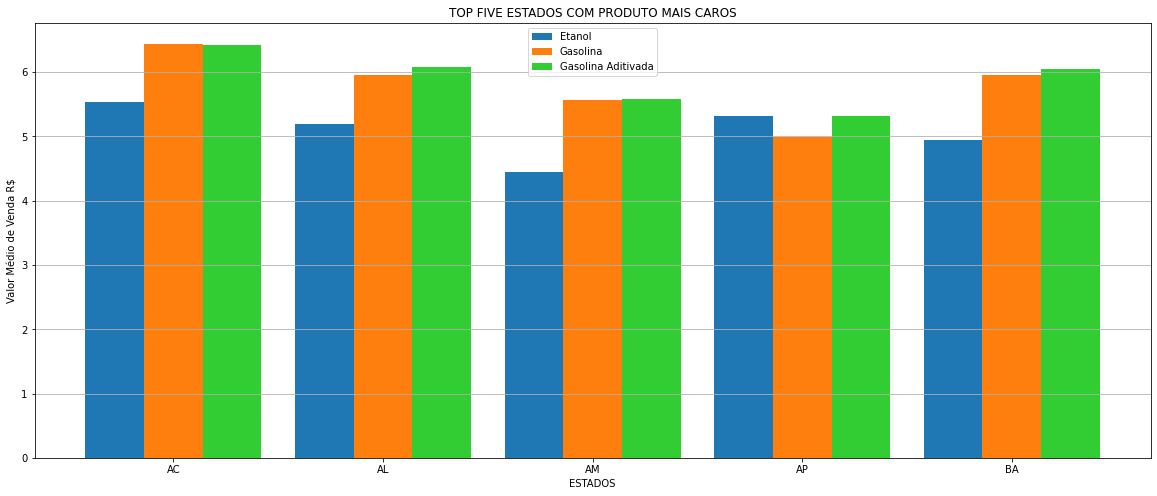

In [422]:
#Overview em Gráfico
wid = 0.28
r1 = np.arange(len(Etanol.index))
r2 = [x + wid for x in r1]
r3 = [x + wid for x in r2]
plt.bar(r1, Etanol, width = wid, label = 'Etanol')
plt.bar(r2, Gasolina, width = wid, label = 'Gasolina')
plt.bar(r3, Aditivada, width = wid, label = 'Gasolina Aditivada', color = '#32CD32')
plt.xticks([r + wid for r in range(len(Etanol.index))], Etanol.index.sort_values())
plt.ylabel('Valor Médio de Venda R$')
plt.xlabel('ESTADOS')
plt.title('TOP FIVE ESTADOS COM PRODUTO MAIS CAROS')
plt.legend()
plt.grid(axis = 'y')
plt.show()

- Os mesmos cinco estados se repetem na escala de estados com produtos vendidos com preço médio mais elevados

*Resumindo: São estados com dificuldade logística e geográfica mais eminentes. Provocando, com isso, um valor médio mais alto*

**4) Qual o preço médio da gasolina e do etanol por estado?**

In [405]:
etanol = dadosGerEta.groupby(['Estado - Sigla'])['Valor de Venda'].mean()

In [406]:
gasolina = dadosGerGas.groupby(['Estado - Sigla'])['Valor de Venda'].mean()

In [407]:
aditivada = dadosGerAdi.groupby(['Estado - Sigla'])['Valor de Venda'].mean()

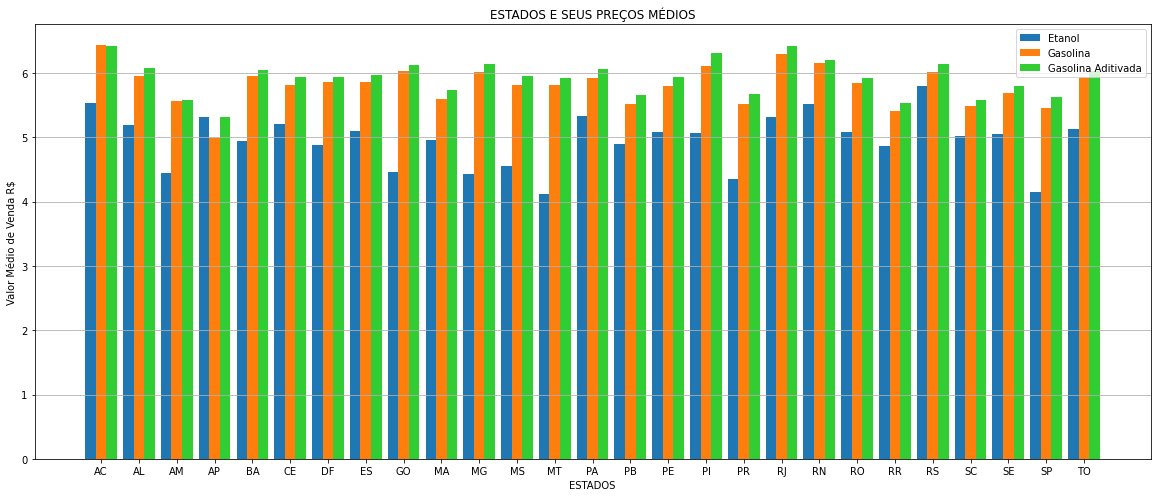

In [416]:
#Overview em Gráfico
wid = 0.28
r1 = np.arange(len(etanol.index))
r2 = [x + wid for x in r1]
r3 = [x + wid for x in r2]
plt.bar(r1, etanol, width = wid, label = 'Etanol')
plt.bar(r2, gasolina, width = wid, label = 'Gasolina')
plt.bar(r3, aditivada, width = wid, label = 'Gasolina Aditivada', color = '#32CD32')
plt.xticks([r + wid for r in range(len(etanol.index))], etanol.index.sort_values())
plt.ylabel('Valor Médio de Venda R$')
plt.xlabel('ESTADOS')
plt.title('ESTADOS E SEUS PREÇOS MÉDIOS')
plt.legend()
plt.grid(axis = 'y')
plt.show()

- O preço se destaca bastante nos estados mais afastado do "centro" do país e com localidades mais remotas.
- No gráfico, é perceptível que São Paulo tem o segundo etanol mais barato, e que o Acre tem a Gasolina mais cara (superando a aditivada).

## V. Conclusão

A partir das análises realizadas no projeto, podemos verificar que as regiões mais afastadas são as que mais sofrem com a variação de preço do combustível. Por exemplo, nas médias de valor mais alto por estado, a região Norte e Centro Oeste foram as que obtiveram os maiores valores de preço de venda. A diferença na precificação da gasolina entre os estados também pode ser explicada pelo valor do ICMS. 

Foram realizadas pesquisas complementares para compreender o contexto sócio econômico vigente no país durante o período analisado e nos demais meses de 2021. O objetivo era analisar se os valores pertenciam a algum padrão.
A partir das consultas, compreendemos que no mês 6 (junho) houve um pico, enquanto no mês 7 (julho) se estabilizou, devido a fatores variantes de especulação e também ao agravante da pandemia.

Foi possível verificar ainda que, as cidades que apresentam os valores mais altos da gasolina e do etanol, não estão localizadas no centro-oeste, que é a região que possui a maior média nacional de preços de venda dos produtos.

Nas questões finais, utilizamos gráficos (boxplot) para analisar possíveis outliers. Devido a curta periodicidade da análise, constatou-se uma variação mínima. A expectativa era de que esses resultados fossem valores discrepantes em relação a valores altos, porém os outliers foram abaixo da média. 

Contudo, vale ressaltar que o valor do combustível está alto de uma maneira geral e diversos fatores podem influenciar o preço, como por exemplo: cotações do dólar, do barril de petróleo e de outras commodities. 

O Brasil apesar de ser um dos maiores produtores de petróleo, não possui tecnologia de refino e, por isso, precisa importar de outros países. O valor do petróleo afeta a inflação e a logística de comércio não beneficia as regiões com maiores potenciais de venda.